# scRNA-seq analysis

Here we will use 10X PBMCs scRNA-seq dataset as an example to illustrate how SIMBA performs scRNA-seq analysis

In [1]:
import os
import simba as si
si.__version__

/srv/local/jayoung/conda/envs/jy_simba_copy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.1'

In [2]:
workdir = 'result_simba_baron'
si.settings.set_workdir(workdir)

Saving results in: result_simba_baron


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
1


1

In [5]:
# make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_9629/3704955539.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### load example data

In [6]:
adata_CG = si.datasets.rna_baron2016()

rna_baron2016.h5ad: 125MB [00:09, 13.0MB/s]                               


Downloaded to result_simba_baron/data.


In [7]:
adata_CG

AnnData object with n_obs × n_vars = 8569 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

### preprocessing

In [8]:
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
8569 cells, 15558 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
8569 cells, 14689 genes


In [9]:
si.pp.cal_qc_rna(adata_CG)

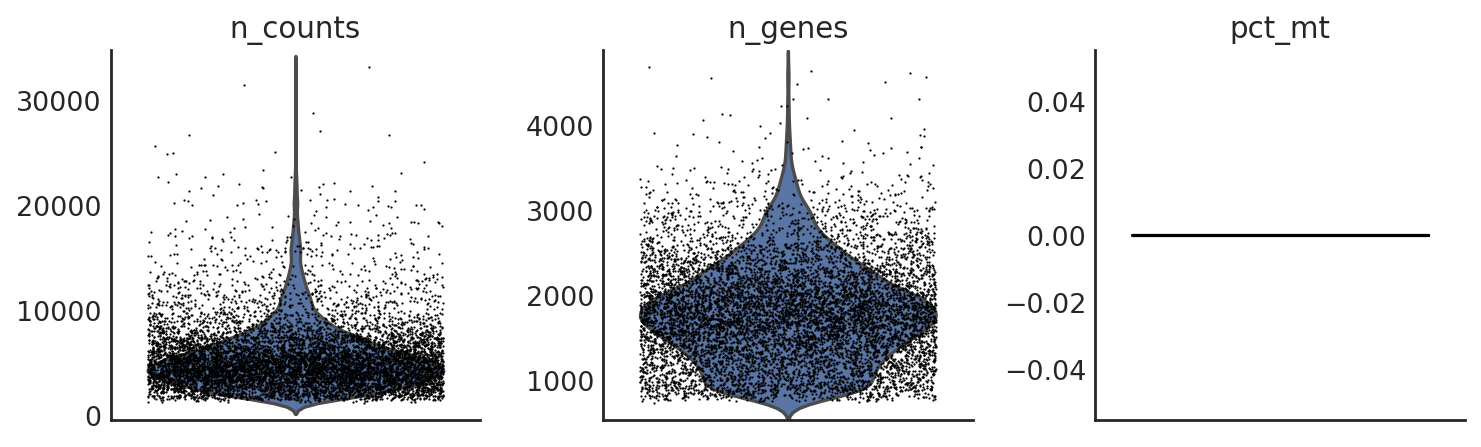

In [10]:
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt'])

Filter out cells if needed:

```python
si.pp.filter_cells_rna(adata,min_n_genes=100)
```

In [11]:
si.pp.normalize(adata_CG,method='lib_size')

In [12]:
si.pp.log_transform(adata_CG)

Optionally, variable gene selection step can be also performed. 

```python
si.pp.select_variable_genes(adata_CG, n_top_genes=2000)
si.pl.variable_genes(adata_CG,show_texts=True)
```

This will speed up the training procedure as only variable genes are encoded into the graph. But we won't obtain the embeddings of non-variable genes.

### discretize RNA expression

In [13]:
si.tl.discretize(adata_CG,n_bins=5)

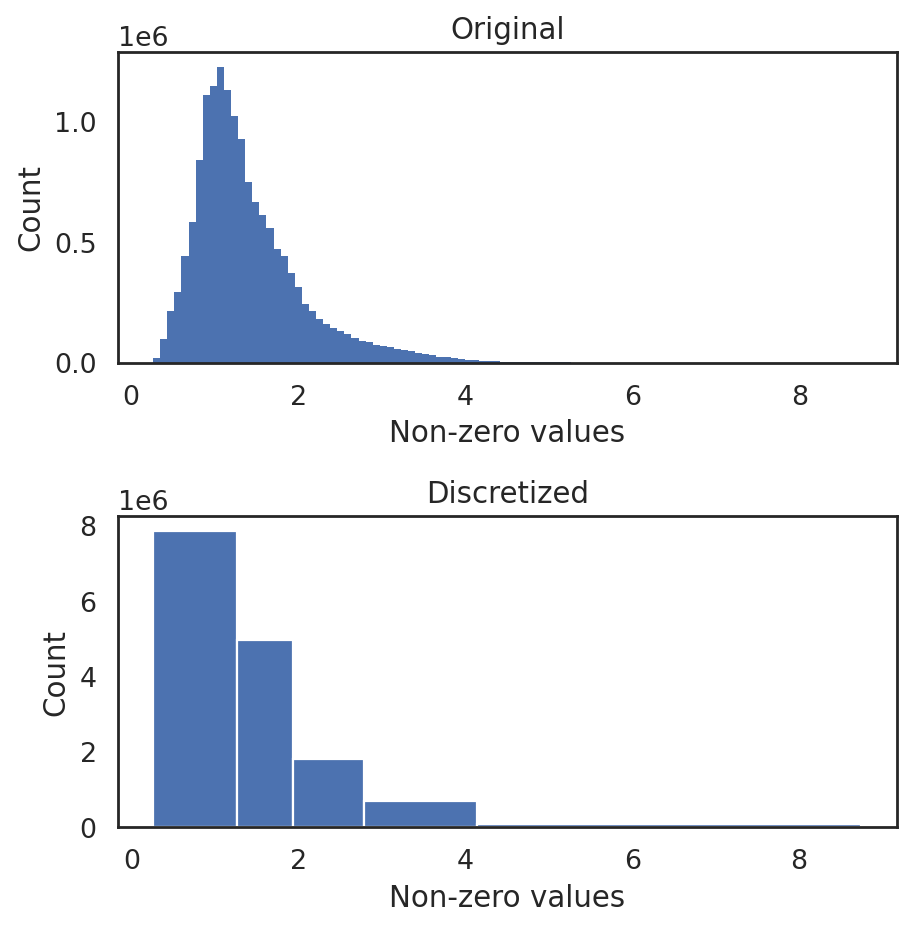

In [14]:
si.pl.discretize(adata_CG,kde=False)

### generate graph

In [15]:
%%time
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                dirname='graph0',
                get_marker_significance=False,
            )

/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:269: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(dict_df_cells[k],
/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:277: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(df_genes,


relation0: source: C, destination: G
#edges: 7863156


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation1: source: C, destination: G
#edges: 4953357


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation2: source: C, destination: G
#edges: 1803388


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation3: source: C, destination: G
#edges: 696860


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation4: source: C, destination: G
#edges: 71381


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


Total number of edges: 15388142
Writing graph file "pbg_graph.txt" to "result_simba_baron/pbg/graph0" ...
Finished.
CPU times: user 34.8 s, sys: 5.21 s, total: 40 s
Wall time: 40.5 s


### PBG training

Before PBG training, let's take a look at the parameters:

In [16]:
si.settings.workdir

'result_simba_baron'

In [17]:
si.settings.pbg_params

{'entity_path': 'result_simba_baron/pbg/graph0/input/entity',
 'edge_paths': ['result_simba_baron/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1}, 'G': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers': 4,
 'num_batch_negs': 50,
 'num_uniform_negs': 50,
 'loss_fn': 'softmax',
 'lr': 0.1,
 'early_stopping': False,
 'regularization_coef': 0.0,
 'wd': 0.0,
 'wd_interval': 50,
 'eval_fraction': 0.05,
 'eval_num_batch_negs': 50,
 'eval_num_uniform_negs'

In [18]:
si.settings.graph_stats

{'graph0': {'relation0': {'source': 'C',
   'destination': 'G',
   'n_edges': 7863156},
  'relation1': {'source': 'C', 'destination': 'G', 'n_edges': 4953357},
  'relation2': {'source': 'C', 'destination': 'G', 'n_edges': 1803388},
  'relation3': {'source': 'C', 'destination': 'G', 'n_edges': 696860},
  'relation4': {'source': 'C', 'destination': 'G', 'n_edges': 71381},
  'n_edges': 15388142,
  'entities': {'C': {'num_partitions': 1}, 'G': {'num_partitions': 1}},
  'relations': [{'name': 'r0',
    'lhs': 'C',
    'rhs': 'G',
    'operator': 'none',
    'weight': 1.0},
   {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
   {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
   {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
   {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}]}}

If no parameters need to be adjusted, the training can be simply done with:

```python
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')
```

Here we show how to adjust training-related parameters if needed. In general, weight decay `wd` is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided `wd` (enabling it by setting `auto_wd=True`) works well.

E.g. we want to change `wd_interval`:

In [19]:
%%time
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.015521 
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 12 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

Auto-estimated weight decay is 2.302757E-03
`.settings.pbg_params['wd']` has been updated to 2.302757E-03
Converting input data ...
[2022-11-09 22:39:57.345629] Using the 5 relation types given in the config
[2022-11-09 22:39:57.346157] Searching for the entities in the edge files...
[2022-11-09 22:40:22.110960] Entity type C:
[2022-11-09 22:40:22.112727] - Found 8569 entities
[2022-11-09 22:40:22.113244] - Removing the ones with fewer than 1 occurrences...
[2022-11-09 22:40:22.115640] - Left with 8569 entities
[2022-11-09 22:40:22.116029] - Shuffling them...
[2022-11-09 22:40:22.121823] Entity type G:
[2022-11-09 22:40:22.122802] - Found 14689 entities
[2022-11-09 22:40:22.123171] - Removing the ones with fewer than 1 occurrences...
[2022-11-09 22:40:22.126079] - Left with 14689 entities
[2022-11-09 22:40:22.126439] - Shuffling them...
[2022-11-09 22:40:22.137017] Preparing counts and dictionaries for entities and relation types:
[2022-11-09 22:40:22.145990] - Writing count of entity 

[2022-11-09 22:41:19.356276] - Processed 10700000 edges so far...
[2022-11-09 22:41:19.888527] - Processed 10800000 edges so far...
[2022-11-09 22:41:20.427843] - Processed 10900000 edges so far...
[2022-11-09 22:41:20.961392] - Processed 11000000 edges so far...
[2022-11-09 22:41:21.496568] - Processed 11100000 edges so far...
[2022-11-09 22:41:22.034426] - Processed 11200000 edges so far...
[2022-11-09 22:41:22.567311] - Processed 11300000 edges so far...
[2022-11-09 22:41:23.098871] - Processed 11400000 edges so far...
[2022-11-09 22:41:23.628694] - Processed 11500000 edges so far...
[2022-11-09 22:41:24.157498] - Processed 11600000 edges so far...
[2022-11-09 22:41:24.692530] - Processed 11700000 edges so far...
[2022-11-09 22:41:25.224346] - Processed 11800000 edges so far...
[2022-11-09 22:41:25.752942] - Processed 11900000 edges so far...
[2022-11-09 22:41:26.287522] - Processed 12000000 edges so far...
[2022-11-09 22:41:26.820218] - Processed 12100000 edges so far...
[2022-11-0

> If `wd` is specified by users instead of being automatically decided, then make sure to update it in simba setting:
```python
si.settings.pbg_params = dict_config.copy()
```

The trained result can be loaded in with the following steps:

By default, it's using the current training result stored in `.setting.pbg_params`
```python
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()
```
Users can also specify different pathss
```python
# load in graph ('graph0') info
si.load_graph_stats(path='./result_simba_rnaseq/pbg/graph0/')
# load in model info for ('graph0')
si.load_pbg_config(path='./result_simba_rnaseq/pbg/graph0/model/')
```

plotting training metrics to make sure the model is not overfitting

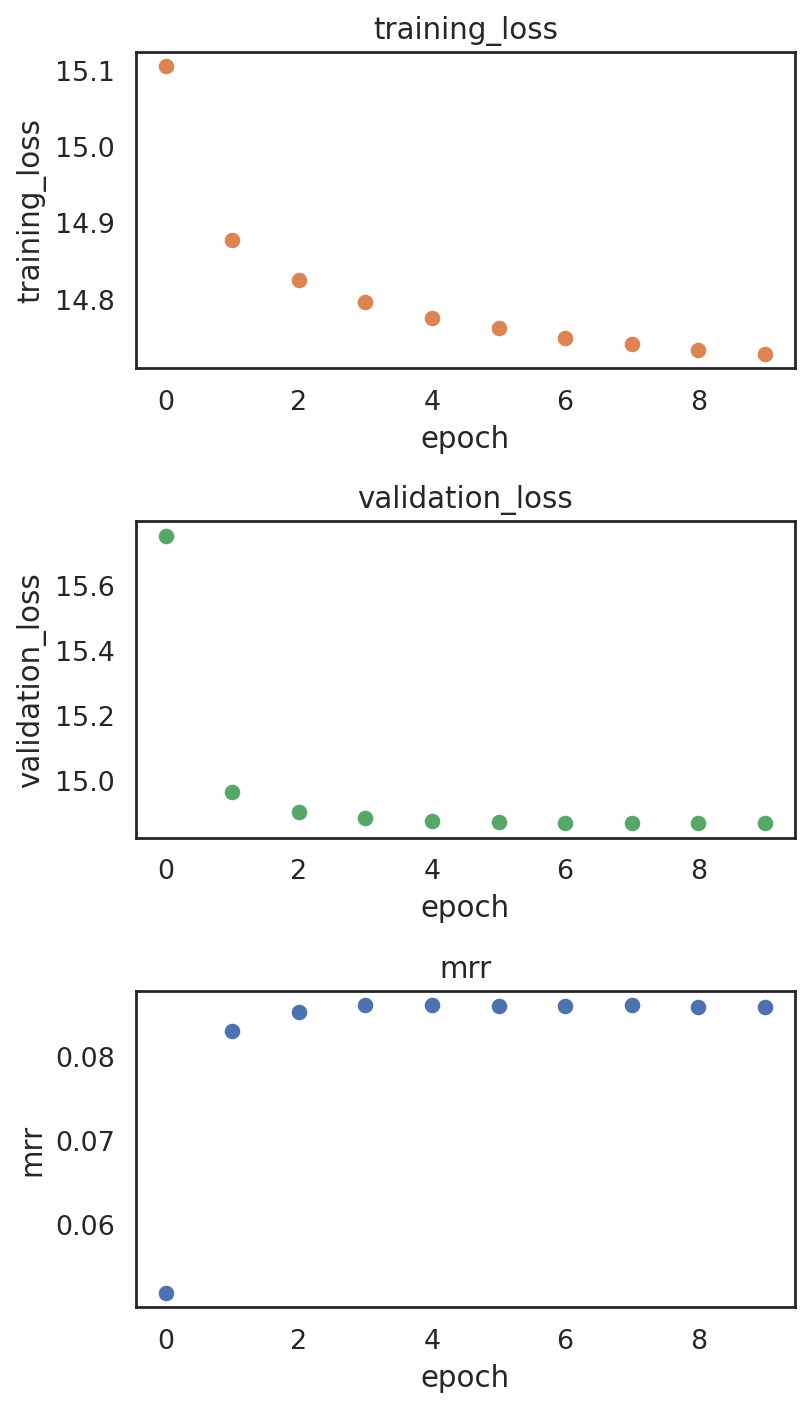

In [20]:
si.pl.pbg_metrics(fig_ncol=1)

### post-training analysis

In [21]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e', 
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

In [24]:
%%time
dict_adata = si.read_embedding(get_marker_significance=False)

CPU times: user 73.5 ms, sys: 9.94 ms, total: 83.4 ms
Wall time: 83.4 ms


In [25]:
dict_adata

{'G': AnnData object with n_obs × n_vars = 14689 × 50,
 'C': AnnData object with n_obs × n_vars = 8569 × 50}

In [32]:
adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes
#adata_nG = dict_adata['nG'] # embeddings for null genes

In [27]:
adata_C

AnnData object with n_obs × n_vars = 8569 × 50

In [28]:
adata_G

AnnData object with n_obs × n_vars = 14689 × 50

SIMBA metrics

In [30]:
%%time
adata_cmp = si.tl.compare_entities(adata_ref=adata_C, adata_query=adata_G, )

CPU times: user 41 s, sys: 5.16 s, total: 46.2 s
Wall time: 46.2 s


In [31]:
workdir

'result_simba_baron'

In [33]:
adata_C.write(os.path.join(workdir, 'adata_C.h5ad'))
adata_G.write(os.path.join(workdir, 'adata_G.h5ad'))
adata_cmp.write(os.path.join(workdir, 'adata_cmp.h5ad'))

In [36]:
import numpy as np


In [40]:
np.savez("baron_cmp_X.npz", adata_cmp.X)

In [47]:
np.savez("baron_cmp_norm.npz", adata_cmp.layers['norm'])
np.savez("baron_cmp_softmax.npz", adata_cmp.layers['softmax'])

In [41]:
adata_cmp

AnnData object with n_obs × n_vars = 8569 × 14689
    var: 'max', 'maxmin', 'std', 'gini', 'entropy'
    layers: 'norm', 'softmax'

In [45]:
adata_cmp.var.to_csv("baron_genes.txt")
adata_cmp.obs.to_csv("baron_cells.txt")

Read back anndata objects
```python
adata_CG = si.read_h5ad(os.path.join(workdir, 'adata_CG.h5ad'))
adata_C = si.read_h5ad(os.path.join(workdir, 'adata_C.h5ad'))
adata_G = si.read_h5ad(os.path.join(workdir, 'adata_G.h5ad'))
adata_all = si.read_h5ad(os.path.join(workdir, 'adata_all.h5ad'))
adata_cmp = si.read_h5ad(os.path.join(workdir, 'adata_cmp.h5ad'))
```

In [48]:
# embed cells and genes into the same space
adata_all = si.tl.embed(adata_ref=adata_C,list_adata_query=[adata_G])

Performing softmax transformation for query data 0;


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_post_training.py:189: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  obs_all = obs_all.append(obs_query, ignore_index=False)


In [49]:
adata_all.obs.head()

,id_dataset
human3_lib3.final_cell_0120,ref
human2_lib2.final_cell_0209,ref
human1_lib1.final_cell_0116,ref
human4_lib3.final_cell_0010,ref
human4_lib3.final_cell_0527,ref


In [50]:
## add annotations of cells and genes
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype']
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

KeyError: 'celltype'

In [30]:
adata_all.obs.head()

,celltype,id_dataset,entity_anno
ATCCCGTGCAGTCA-1,NK,ref,NK
ATGAGCACATCTTC-1,CD4 T,ref,CD4 T
GGCCGATGCCGAAT-1,CD4 T,ref,CD4 T
CTACTATGTAAAGG-1,B,ref,B
CGAATCGAGGAGCA-1,CD14 Monocytes,ref,CD14 Monocytes


In [ ]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

In [ ]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

In [ ]:
si.pl.umap(adata_all,color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           fig_size=(6,5))

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
si.pl.umap(adata_all[::-1,],color=['entity_anno'],dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=marker_genes + ['GAPDH', 'B2M'],
           show_texts=True,
           fig_size=(8,6))